## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read the dataset

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print("categories in 'gender' variable: ",end = " ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable: ",end = " ")
print(df['race/ethnicity'].unique())

print("categories in 'parental level of education ' variable: ",end = " ")
print(df['parental level of education'].unique())

print("categories in 'lunch ' variable: ",end = " ")
print(df['lunch'].unique())

print("categories in 'test preparation course ' variable: ",end = " ")
print(df['test preparation course'].unique())

categories in 'gender' variable:  ['female' 'male']
categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education ' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch ' variable:  ['standard' 'free/reduced']
categories in 'test preparation course ' variable:  ['none' 'completed']


In [13]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print(' we have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print(' we have {} categorical features : {}'.format(len(categorical_features),categorical_features))

 we have 3 numerical features : ['math score', 'reading score', 'writing score']
 we have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [14]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [15]:
# Adding a column -> total score (sum of all scores)
df['Total Score'] = df['math score']+df['reading score']+df['writing score']
# Adding column Average score (avg of all)
df['Average Score'] = df['Total Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading score'] == 100]['Average Score'].count()
writing_full = df[df['writing score'] == 100]['Average Score'].count()
math_full = df[df['math score'] == 100]['Average Score'].count()

print(f" Number of Students with full marks in Maths :{math_full}")
print(f" Number of Students with full marks in Reading :{reading_full}")
print(f" Number of Students with full marks in Writing :{writing_full}")

 Number of Students with full marks in Maths :7
 Number of Students with full marks in Reading :17
 Number of Students with full marks in Writing :14


In [18]:
reading_less_20 = df[df['reading score'] <= 20]['Average Score'].count()
writing_less_20 = df[df['writing score'] <= 20]['Average Score'].count()
math_less_20 = df[df['math score'] <= 20]['Average Score'].count()

print(f" Number of Students with full marks in Maths :{math_less_20}")
print(f" Number of Students with full marks in Reading :{reading_less_20}")
print(f" Number of Students with full marks in Writing :{writing_less_20}")

 Number of Students with full marks in Maths :4
 Number of Students with full marks in Reading :1
 Number of Students with full marks in Writing :3


## Histogram or kde

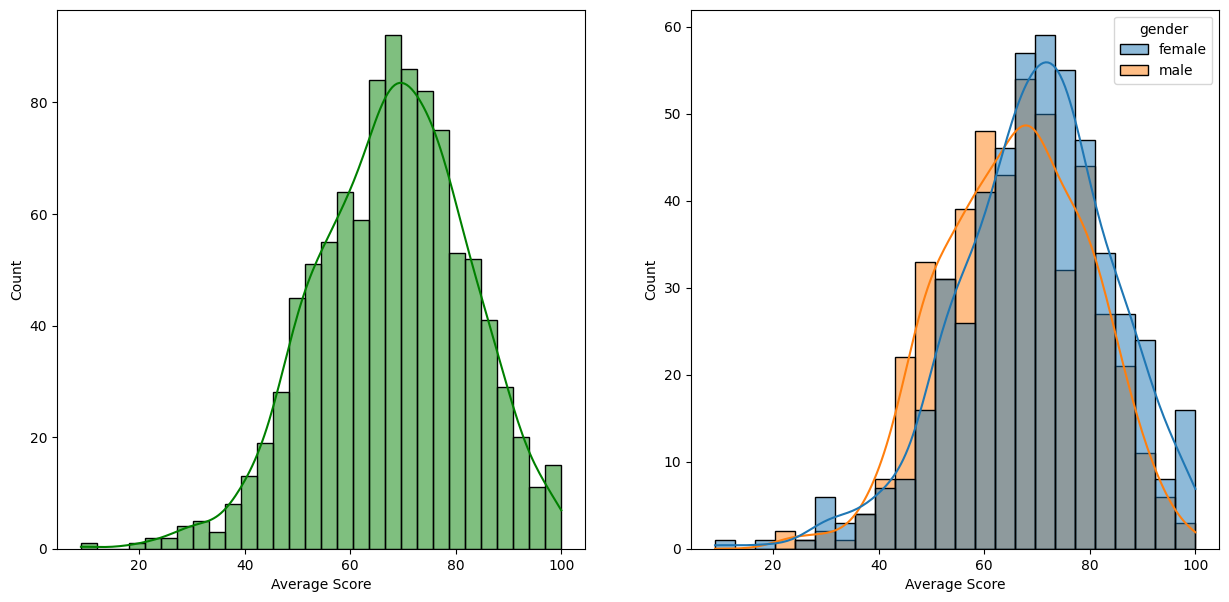

In [20]:
fig,axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average Score',kde=True,hue='gender')
plt.show()

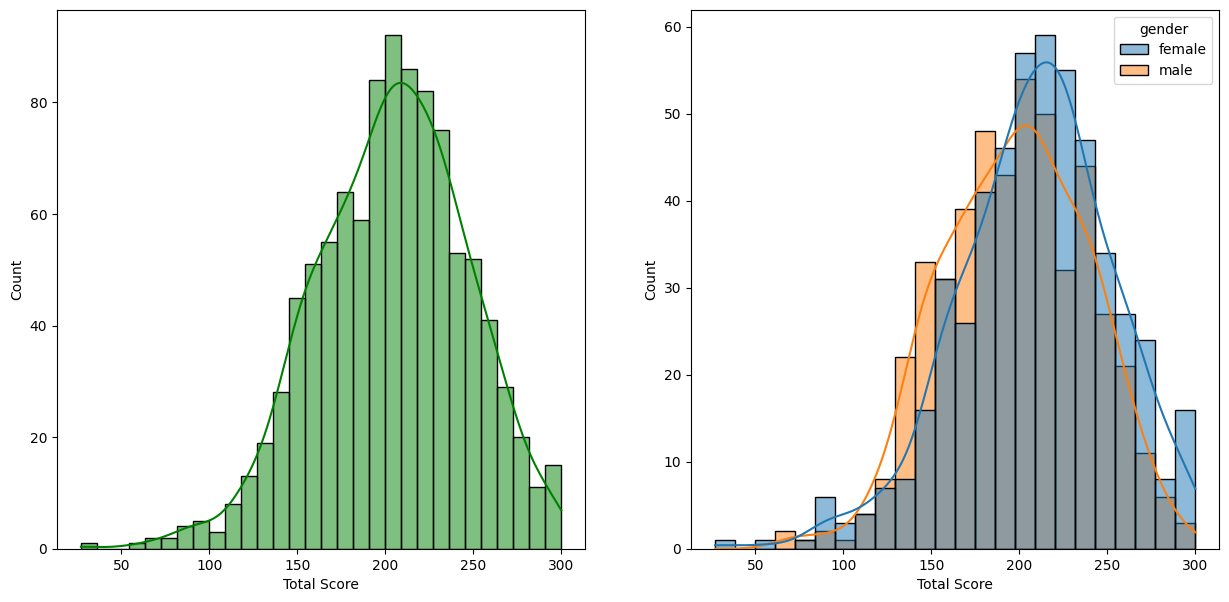

In [21]:
fig,axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total Score',kde=True,hue='gender')
plt.show()

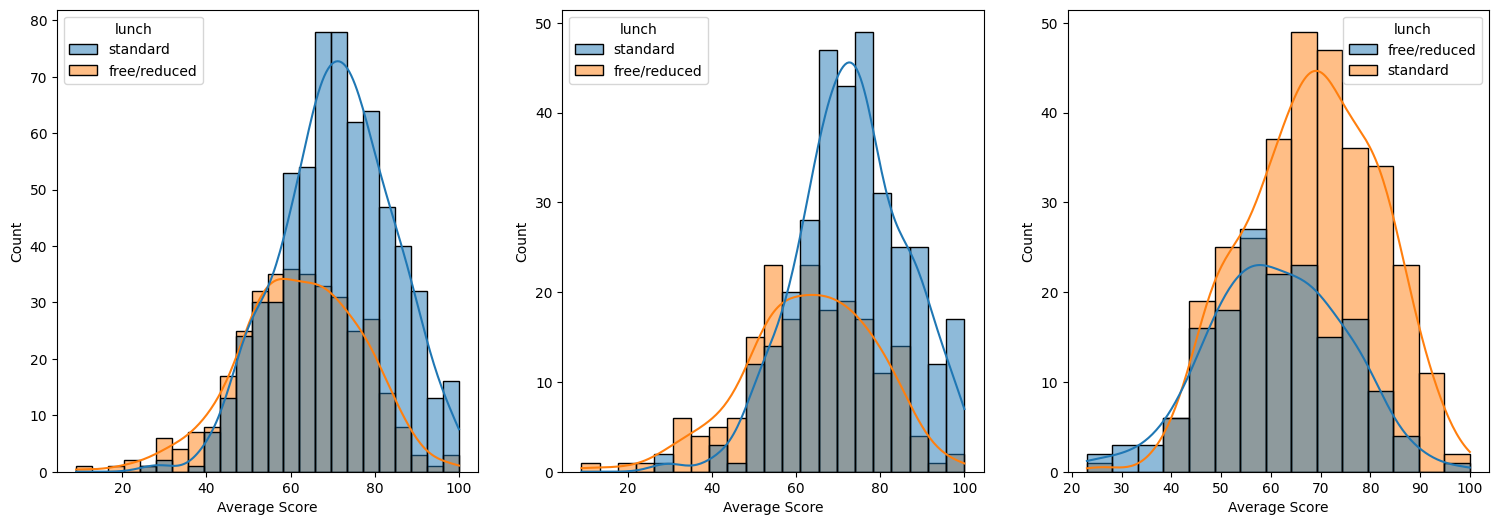

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average Score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average Score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average Score',kde=True,hue='lunch')
plt.show()